# Figures for *deep-GMF* project

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.facecolor'] = 'white'
#plt.style.use('white_background')

## Data import

In [74]:
model = 'ResNet34'
dataset = 'manyIDmanyIMG'
target = 'shape'
epoch = '010'
df = pd.read_csv(f'../results/{model}_dataset-{dataset}_target-{target}_epoch-{epoch}.tsv', sep='\t')
history = pd.read_csv(f'../trained_models/{model}_dataset-{dataset}_target-{target}/history.csv')

(-0.05, 107.0)

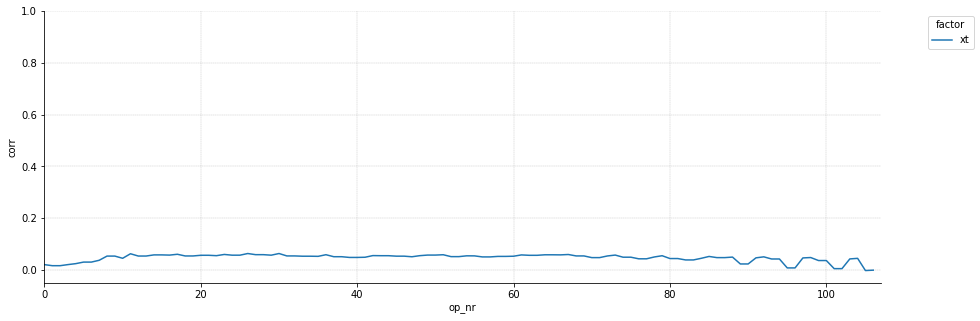

In [79]:
factors = ['xt']
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.lineplot(x='op_nr', y='corr', hue='factor', ax=ax, data=df.query("factor in @factors"))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
sns.despine()

ax.grid(ls='--', lw=0.35)
ax.set_ylim(-.05, 1)
ax.set_xlim(-.05, df['op_nr'].max() + 1)

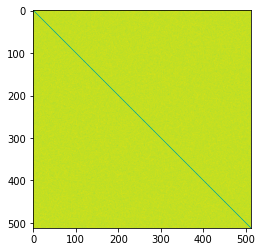

In [72]:
rdm_n = np.load(f'../results/{model}_dataset-{dataset}_target-shape_epoch-010_rdm-neural.npz')
rdm_f = np.load(f'../results/{model}_dataset-{dataset}_target-shape_epoch-010_rdm-feature.npz')

plt.imshow(rdm_f['tex'])

In [36]:
facs = ['bg', 'l', 'xt', 'xr', 'id']
this_df = df.query("factor in @facs")
ops = ['input', 'conv', 'globalpool', 'logits']
this_df = this_df.query("operation in @ops")
rdm_n = np.load(f'../results/{model}_dataset-{dataset}_target-id_rdm-neural.npz')
rdm_f = np.load(f'../results/{model}_dataset-{dataset}_target-id_rdm-feature.npz')

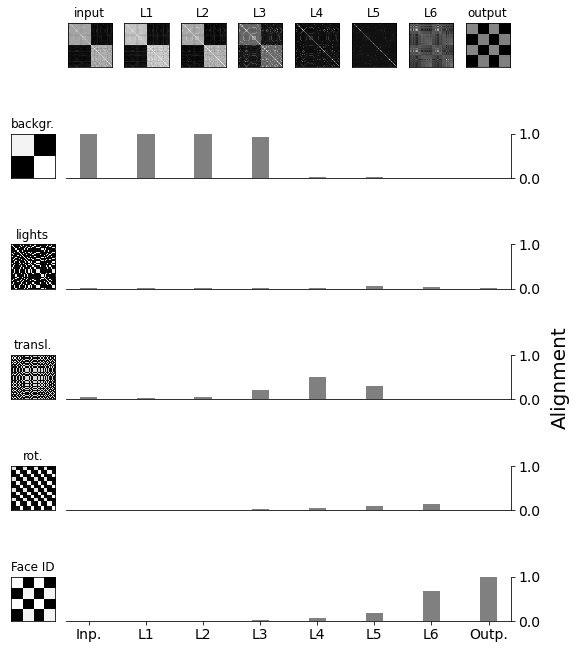

In [68]:
n_layers = this_df['layername'].nunique()
n_factors = this_df['factor'].nunique()

fig = plt.figure(constrained_layout=False, figsize=(n_layers + 1, n_factors + 6))
gs = fig.add_gridspec(nrows=n_factors + 1, ncols=n_layers + 1)
ax = fig.add_subplot(gs[0, 0])
ax.axis('off')

for i, lay in enumerate(this_df['layername'].unique()):
    ax = fig.add_subplot(gs[0, i+1])
    rdm = rdm_n[lay]
    ax.imshow(rdm, cmap='gray', interpolation='none')
    ax.set_xticks([])
    ax.set_yticks([])
    
    if 'input' in lay:
        name = 'input'
    elif 'id' in lay:
        name = 'output'
    else:
        name = f'L{i}'
        #name = f"{lay.split('_')[-1]} ({lay.split('_')[0].split('-')[1]})"

    ax.set_title(name)
    
for i, f in enumerate(facs):
    ax = fig.add_subplot(gs[i+1, 0])
    rdm = rdm_f[f]
    ax.imshow(rdm, cmap='gray', interpolation='none')
    ax.set_title({'bg': 'backgr.', 'xt': 'transl.', 'xr': 'rot.', 'l': 'lights', 'id': 'Face ID'}[f])
    ax.set_xticks([])
    ax.set_yticks([])

    ax = fig.add_subplot(gs[i+1, 1:])
    vals = this_df.query("factor == @f")
    ax.bar(range(vals['corr'].size), vals['corr'], width=0.3, color='gray')
    ax.set_ylim(0, 1.)
    ax.set_xlim(-0.4, 7.4)
    if i == 2:
        ax.set_ylabel('Alignment', fontsize=20, labelpad=10)
    
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if i != len(facs) - 1:
        ax.set_xticks([])#labels([])
    else:
        ax.set_xticks(range(8))
        ax.set_xticklabels(['Inp.', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'Outp.'], fontsize=14)
        #ax.set_xlabel('Layer', fontsize=20)
        
    ax.set_yticks([0., 1.])
    ax.set_yticklabels([0., 1.], fontsize=14)

fig.subplots_adjust(hspace=1.5)
fig.savefig(f'test.png', dpi=300, bbox_inches='tight')